In [155]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
plt.style.use('seaborn')

df_house = pd.read_csv('kc_house_data.csv')
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [156]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [157]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [158]:
df_house = df_house.fillna(0)

In [159]:
df_house['sqft_basement'] = df_house['sqft_basement'].astype(str).astype(float).astype(int)

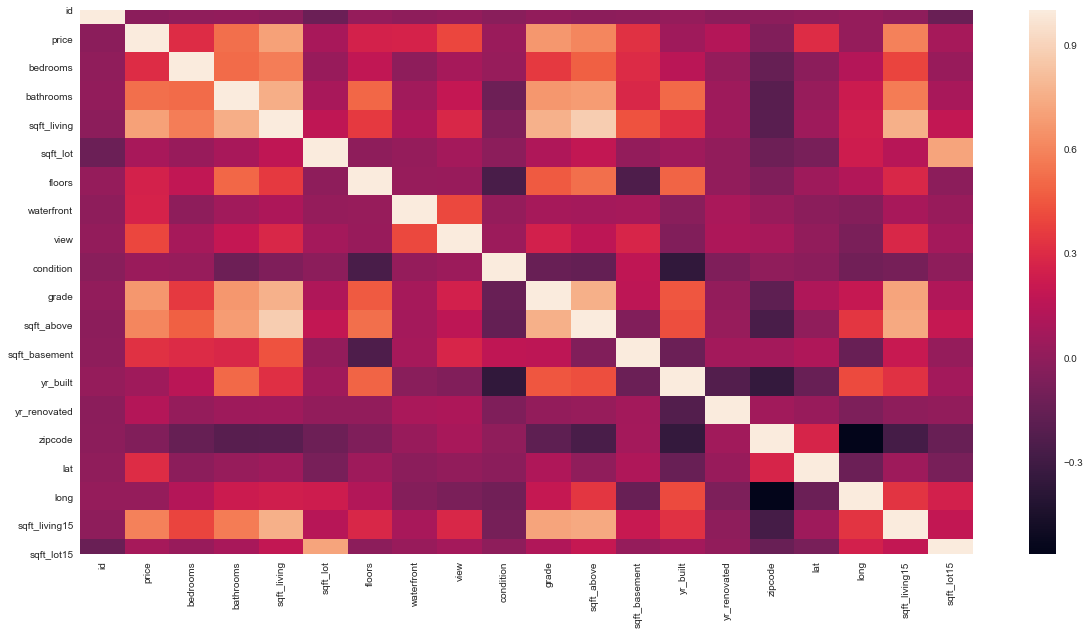

In [160]:
f, ax = plt.subplots(figsize=(20, 10))
corr = df_house.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [161]:
def drop_outliers(data, col, n_std):
    """
    Return a dataframe without outliers
    Parameters:
    data: dataframe
    col: column to check for outliers
    n_std: number of standard deviations to consider when dropping outliers
    """
    return data[np.abs(data[col]-data[col].mean())<=(n_std*data[col].std())]
df_house_normal = drop_outliers(df_house,'price',2)

In [162]:
df_house_normal['home_age'] = [(2020 - i) for i in df_house_normal['yr_built']]
df_house_normal.head()

D:\Users\Trevor Mott\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,home_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,65
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,69
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,87
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,55
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,33


In [163]:
df_house_norm = df_house_normal.drop(['id','date','lat','long','condition','yr_built','sqft_living15', 'sqft_above'], axis=1)

In [164]:
df_house_norm.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_basement,yr_renovated,zipcode,sqft_lot15,home_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,0,0,98178,5650,65
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,400,1991,98125,7639,69
2,180000.0,2,1.00,770,10000,1.0,0,0,6,0,0,98028,8062,87
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,910,0,98136,5000,55
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,0,0,98074,7503,33


In [165]:
df_house_norm.loc[df_house_norm['yr_renovated'] > 0, 'yr_renovated'] = 1

In [166]:
df_house_norm.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_basement,yr_renovated,zipcode,sqft_lot15,home_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,0,0,98178,5650,65
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,400,1,98125,7639,69
2,180000.0,2,1.00,770,10000,1.0,0,0,6,0,0,98028,8062,87
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,910,0,98136,5000,55
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,0,0,98074,7503,33


In [167]:
df_house_norm = df_house_norm.rename(columns={"yr_renovated": "renovated"})

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_basement', 'renovated', 'zipcode',
       'sqft_lot15', 'home_age'],
      dtype='object')

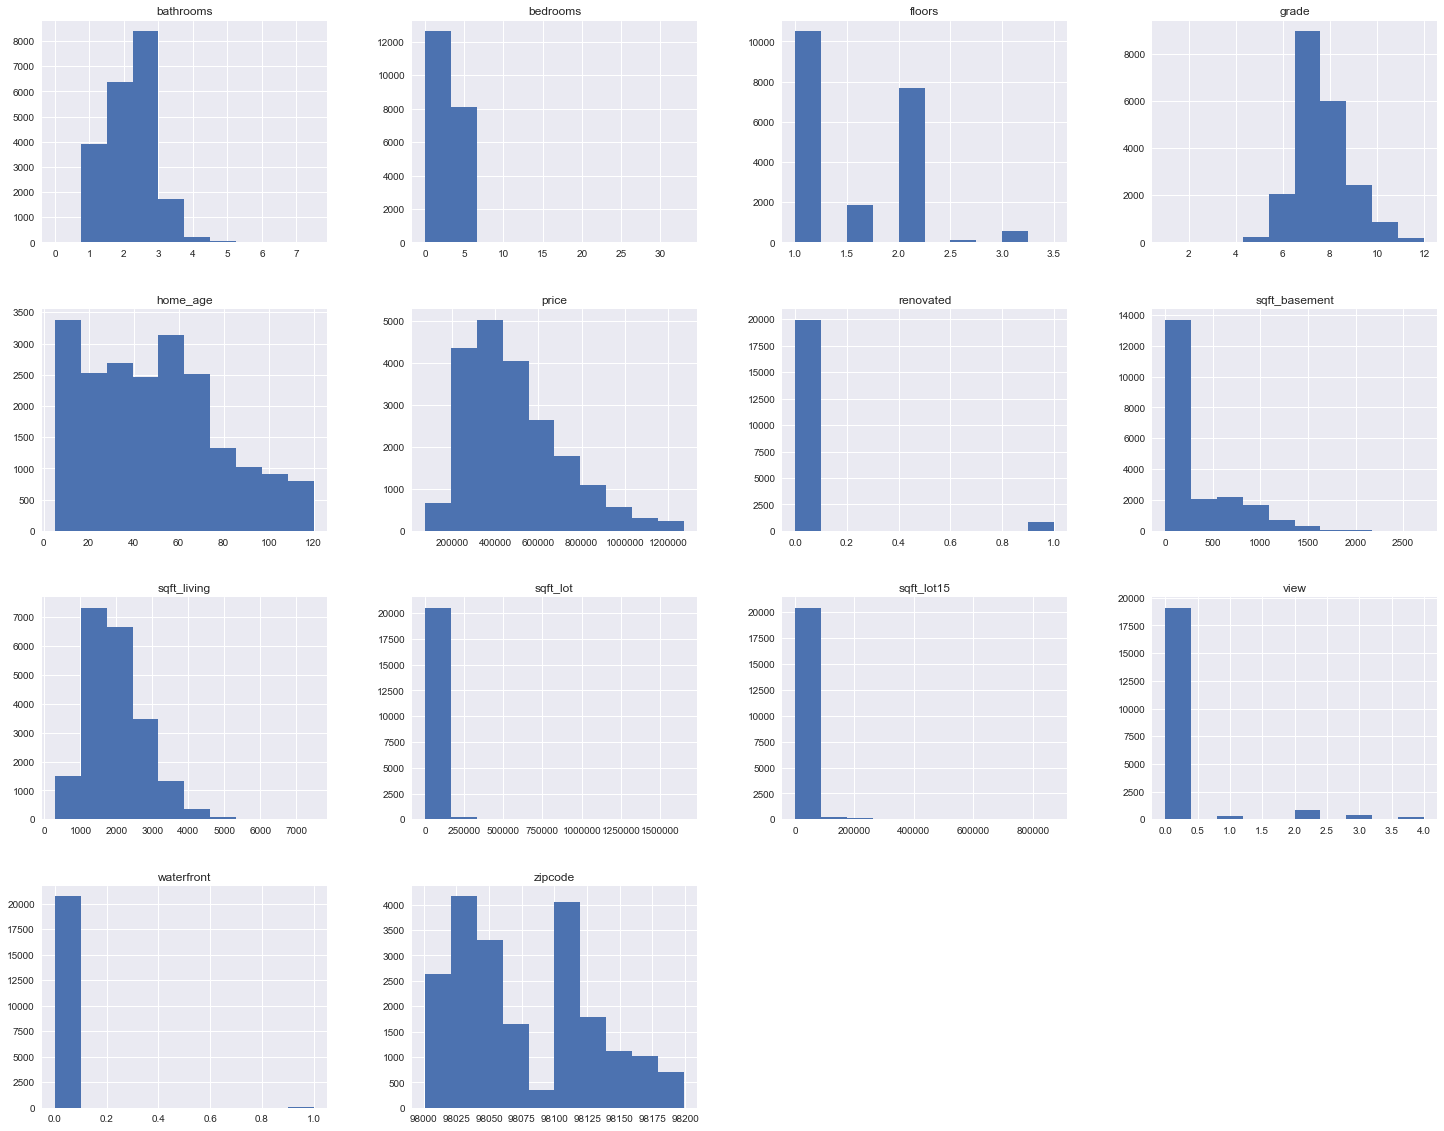

In [168]:
df_house_norm.hist(figsize=(25,20));
df_house_norm.columns

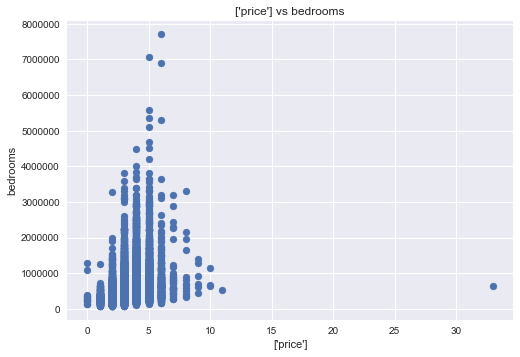

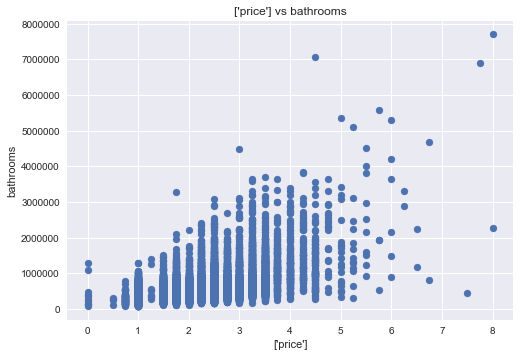

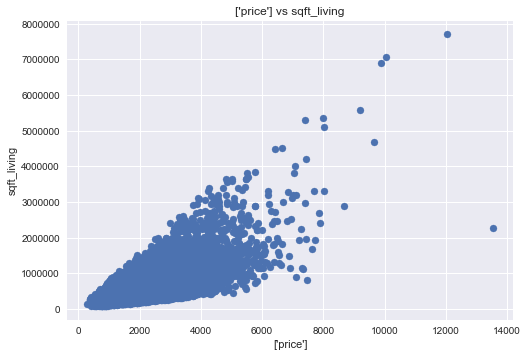

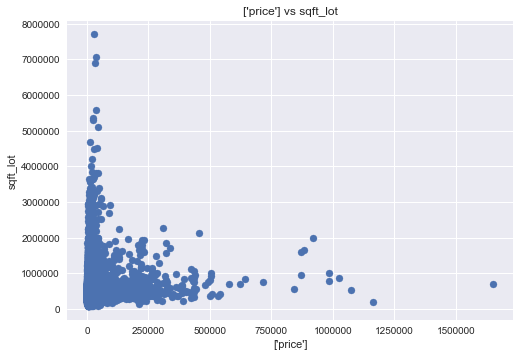

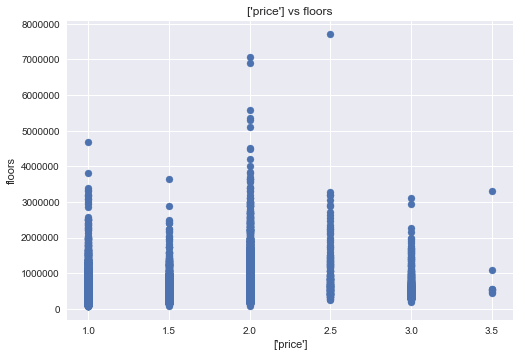

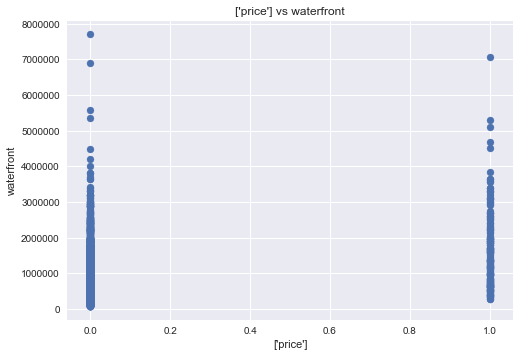

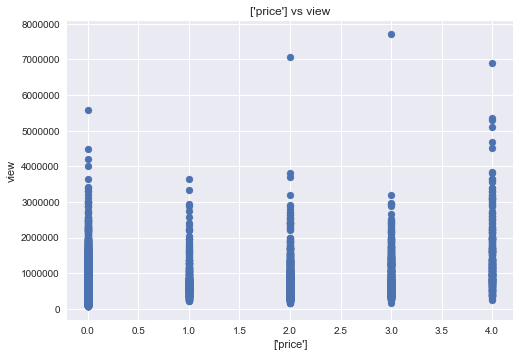

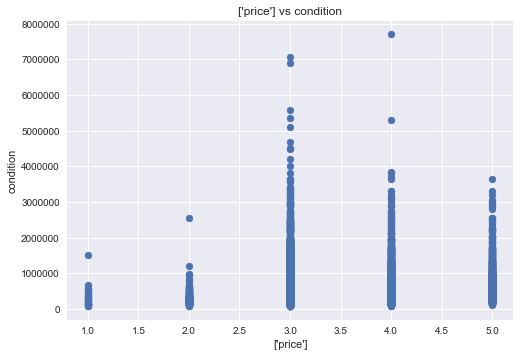

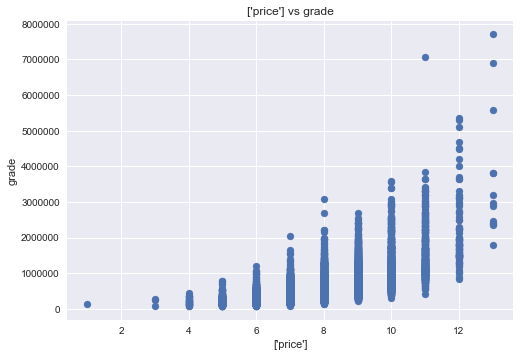

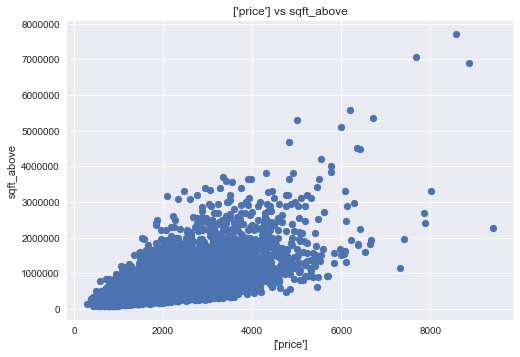

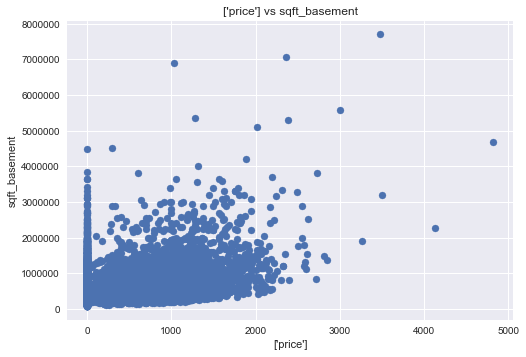

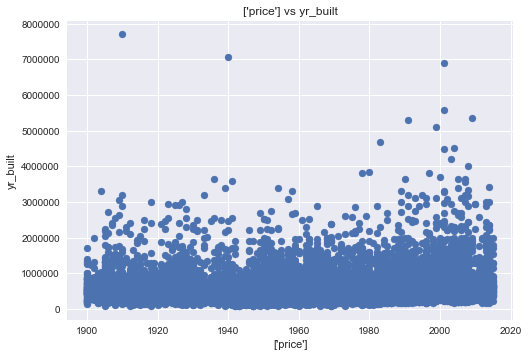

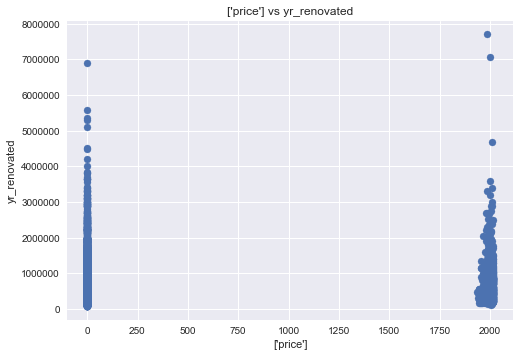

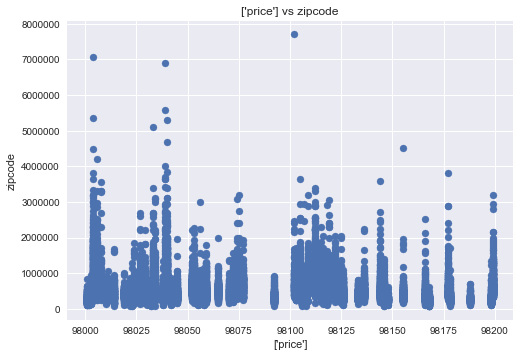

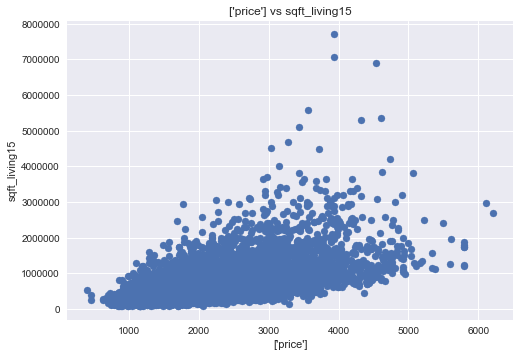

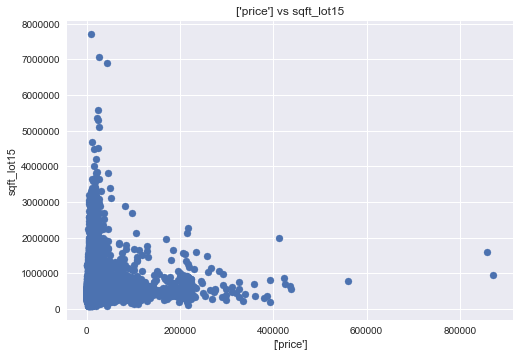

In [169]:



y_columns = ['bedrooms','bathrooms','sqft_living','sqft_lot',
              'floors','waterfront','view','condition','grade',
              'sqft_above','sqft_basement','yr_built','yr_renovated',
              'zipcode','sqft_living15','sqft_lot15']

x_col = ["price"]



for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_house[y_col], df_house[x_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.show()



In [170]:
scaler = MinMaxScaler()
df_house_norm[['bedrooms','bathrooms','sqft_living','sqft_lot','floors']] = scaler.fit_transform(df_house_norm[['bedrooms','bathrooms','sqft_living','sqft_lot','floors']])



df_house_norm = df_house_normal.drop(['sqft_lot15'], axis=1)
df_house_norm.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,home_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,65
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,69
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,87
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,55
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,33


In [171]:
zips = pd.get_dummies(df_house_norm.zipcode, prefix='zip')

df_house_norm = pd.concat([df_house_norm,zips], axis=1)
df_house_norm.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
floor_dummies = pd.get_dummies(df_house_norm['floors'], drop_first=True, prefix='floors')
bed_dummies = pd.get_dummies(df_house_norm['bedrooms'], drop_first=True, prefix='beds')
bath_dummies = pd.get_dummies(df_house_norm['bathrooms'], drop_first=True, prefix='baths')
df_house_norm = pd.concat([df_house_norm,floor_dummies,bed_dummies,bath_dummies], axis=1)
df_house_norm.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,baths_4.5,baths_4.75,baths_5.0,baths_5.25,baths_5.5,baths_5.75,baths_6.0,baths_6.5,baths_6.75,baths_7.5
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
for i in df_house_norm:
    if 'floors_' in i:
        df_house_norm[i] = df_house_norm[i].astype('int')
    elif 'beds' in i:
        df_house_norm[i] = df_house_norm[i].astype('int')
    elif 'baths' in i:
        df_house_norm[i] = df_house_norm[i].astype('int')
    elif 'waterfront' in i:
        df_house_norm[i] = df_house_norm[i].astype('int')

In [21]:
 df_house_norm.dtypes

id              int64
date           object
price         float64
bedrooms        int64
bathrooms     float64
               ...   
baths_5.75      int32
baths_6.0       int32
baths_6.5       int32
baths_6.75      int32
baths_7.5       int32
Length: 133, dtype: object

In [22]:
df_house_norm.to_csv(r'modeling_data.csv')

In [27]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df_house_norm[['sqft_living', 'price']])
df_std = std_scale.transform(df_house_norm[['sqft_living', 'price']])

AttributeError: module 'pandas' has no attribute 'std_scale'

In [28]:
df_std

array([[-1.02367003, -1.18417924],
       [ 0.71682405,  0.22500057],
       [-1.53705318, -1.37097024],
       ...,
       [-1.22401467, -0.38083976],
       [-0.49776534, -0.39020606],
       [-1.22401467, -0.72455748]])

,0
0,0.122672
1,0.386639
2,0.087683
3,0.441754
4,0.363257
...,...
20765,0.237996
20766,0.271399
20767,0.273153
20768,0.271399
